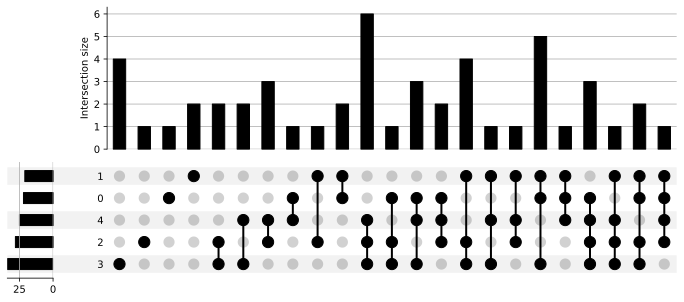

In [1]:
import utils
utils.upset_plot(utils.generate_set_cover_instance(num_sets=5, num_items=50))

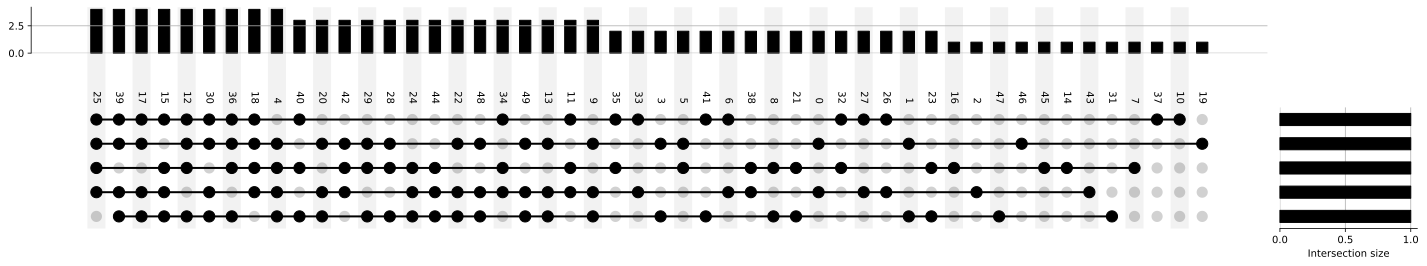

In [2]:
utils.upset_plot(utils.generate_set_cover_instance(num_sets=50, num_items=5), orientation="vertical")

In [3]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def simulate(f, lim = 15, step = 3, sample = 20, title="", cmap="coolwarm"):
	def matrix_plot(data):
		# Plotting the matrix
		plt.imshow(results, cmap=cmap)
		ticks = (np.arange(lim) + 1) * step
		plt.xticks(ticks=np.arange(lim), labels=ticks)
		plt.yticks(ticks=np.arange(lim), labels=ticks)
		plt.gca().invert_yaxis()

		# Adding a color bar to show the mapping of values to colors
		plt.colorbar()
		plt.xlabel('Sets')
		plt.ylabel('Items')
		plt.title(title)

		# Display the plot
		plt.show()

	results = np.zeros((lim, lim))
	for params in product(range(lim), range(lim)):
		results[params] = sum(f(*((np.array(params) + 1) * step)) for _ in range(sample)) / sample
	return matrix_plot(results)

In [4]:
def compare(num_sets, num_items):
	sets = utils.generate_set_cover_instance(num_sets, num_items)
	T = utils.torch_solver(sets, penalty_weight=2).round().int()
	P = utils.pulp_solver(sets).int()
	# return (sum(T) - sum(P)).item() / len(T)
	return (sum(T) / sum(P)).item()
	# return int(sum(T).item()) == int(sum(P).item())

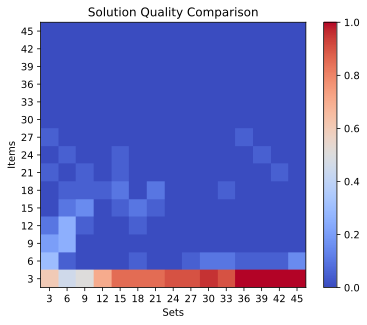

In [5]:
simulate(compare, title="Solution Quality Comparison")

In [6]:
def validate(num_sets, num_items):
	sets = utils.generate_set_cover_instance(num_sets, num_items)
	T = utils.torch_solver(sets, penalty_weight=2).round().int()
	if sum(T) == 0:
		return False
	return all(sets[T.bool()].sum(axis=1) >= 1)

In [7]:
simulate(validate, title="Feasibility", cmap="RdYlGn")

RecursionError: maximum recursion depth exceeded

In [ ]:
data = utils.generate_set_cover_instance(24, 24)
utils.torch_solver(data).round().int()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [ ]:
utils.pulp_solver(data)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])